# Yelp Dataset Analysis - Pub Ratings

In [441]:
import csv
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import LogNorm
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
%matplotlib inline

Import custom restauramt and not_restaurant csv files as dataframes

In [442]:
not_restaurant_df = pd.read_csv('not_restaurant.csv')
not_restaurant_df = not_restaurant_df.drop(['Unnamed: 0','city','distance'], 1)
not_restaurant_df = not_restaurant_df.drop_duplicates(subset=['name','postal_code','latitude','longitude','neighborhood'], keep=False)

pubs_df = pd.read_csv('pubs.csv')
pubs_df = pubs_df.drop(['city','Unnamed: 0'], 1)
pubs_df = pubs_df.drop_duplicates(subset=['name','postal_code','latitude','longitude','neighborhood'], keep=False)
pubs_df['index_no'] = pubs_df.index
pubs_df.head()

not_pubs_df = pd.read_csv('not_pubs.csv')
not_pubs_df = not_pubs_df.drop(['city','Unnamed: 0'], 1)
not_pubs_df = not_pubs_df.drop_duplicates(subset=['name','postal_code','latitude','longitude','neighborhood'], keep=False)
not_pubs_df['index_no'] = not_pubs_df.index
not_pubs_df.head()

toronto_businesses_df = pd.read_csv('toronto_businesses.csv')
toronto_businesses_df = toronto_businesses_df.drop(['city','Unnamed: 0'], 1)
toronto_businesses_df = toronto_businesses_df.drop_duplicates(subset=['name','postal_code','latitude','longitude','neighborhood'], keep=False)
toronto_businesses_df['index_no'] = toronto_businesses_df.index
toronto_businesses_df.head()

,name,postal_code,latitude,longitude,neighborhood,categories,stars,review_count,index_no
0,The Tea Emporium,M4K 1N7,43.677126,-79.353285,Riverdale,"[u'Food', u'Coffee & Tea']",4.5,7,0
1,Hart House Theatre,M5S 3H3,43.663669,-79.394687,University of Toronto,"[u'Arts & Entertainment', u'Performing Arts']",4.0,8,1
2,McCarthy's Irish Pub,M4L 2B5,43.678049,-79.314774,Upper Beach,"[u'Pubs', u'Restaurants', u'Bars', u'Irish', u...",4.0,5,2
3,Paris Bakery & Pastry,M6H 3Z5,43.662401,-79.444706,Wallace Emerson,"[u'Bakeries', u'Food']",3.0,16,3
4,Oishi Sushi,M3J 2G5,43.763510,-79.490750,NaN,"[u'Asian Fusion', u'Restaurants', u'Sushi Bars']",2.0,27,4


In [443]:
not_restaurant_df.describe()

,latitude,longitude,stars,review_count
count,3738.000000,3738.000000,3738.000000,3738.000000
mean,43.659746,-79.390947,3.702381,12.928571
std,0.863939,0.454143,0.979130,24.914754
min,-9.095137,-79.653939,1.000000,3.000000
25%,43.649911,-79.419545,3.000000,4.000000
50%,43.662539,-79.395460,4.000000,6.000000
75%,43.680457,-79.378843,4.500000,13.000000
max,43.844762,-51.833829,5.000000,530.000000


In [444]:
pubs_df.describe()

,latitude,longitude,stars,review_count,index_no
count,203.000000,203.000000,203.000000,203.000000,203.000000
mean,43.668998,-79.388099,3.391626,63.502463,186.078818
std,0.032415,0.057959,0.580695,101.331891,90.279454
min,43.599790,-79.603882,2.000000,3.000000,0.000000
25%,43.650502,-79.414682,3.000000,16.500000,112.500000
50%,43.660418,-79.390206,3.500000,33.000000,187.000000
75%,43.673362,-79.363302,4.000000,71.500000,269.500000
max,43.796148,-79.170583,4.500000,1087.000000,347.000000


In [445]:
final_businesses_df = pd.DataFrame()

def haversine(x):
    
    #global not_restaurant_df
    global not_pubs_df
    global final_businesses_df
    
    
    # Initialize empty DataFrame
    df = pd.DataFrame()
    measure_1 = pd.DataFrame()
    
    # Calculate the latitudes, longitudes:
    df['LAT_rad'], df['LON_rad'] = np.radians(not_pubs_df['latitude']), np.radians(not_pubs_df['longitude'])
    df['dLON'] = df['LON_rad'] - math.radians(x['longitude'])
    df['dLAT'] = df['LAT_rad'] - math.radians(x['latitude'])

    # Use Haversine's formula
    not_pubs_df['distance'] = 6367 * 2 * np.arcsin(np.sqrt(np.sin(df['dLAT']/2)**2 + math.cos(math.radians(37.2175900)) * np.cos(df['LAT_rad']) * np.sin(df['dLON']/2)**2))
   
    
    # Only consider pubs within a distance of 1 km of the chosen pub
    measure_1 = not_pubs_df[not_pubs_df.distance <=0.5]
    
    
    # Calculate the mean rating of the surrounding pubs
    mean_rating = measure_1['stars'].mean()
    density = (measure_1['stars'].count())/ (2*math.pi*1.0*1.0)

    final_businesses_df = final_businesses_df.append({'name': x['name'].item(), 'rating': x['stars'].item(), 'mean_business_rating': mean_rating, "density": density}, ignore_index=True)
    return final_businesses_df


for line in pubs_df['index_no']:
    x = pubs_df.loc[pubs_df['index_no'] == line]
    haversine(x)



In [446]:
final_businesses_df = final_businesses_df[final_businesses_df.density != 0]

## Relationship Between Pub Rating and Non Pub Business Density

We are interested in looking at the relationship between pub ratings and the density of non pub businesses around each pub.

Now we can generate a scatterplot with density of non-pub businesses on the x axis and the ratings of pubs on the Y axis to see if any relationship exists.

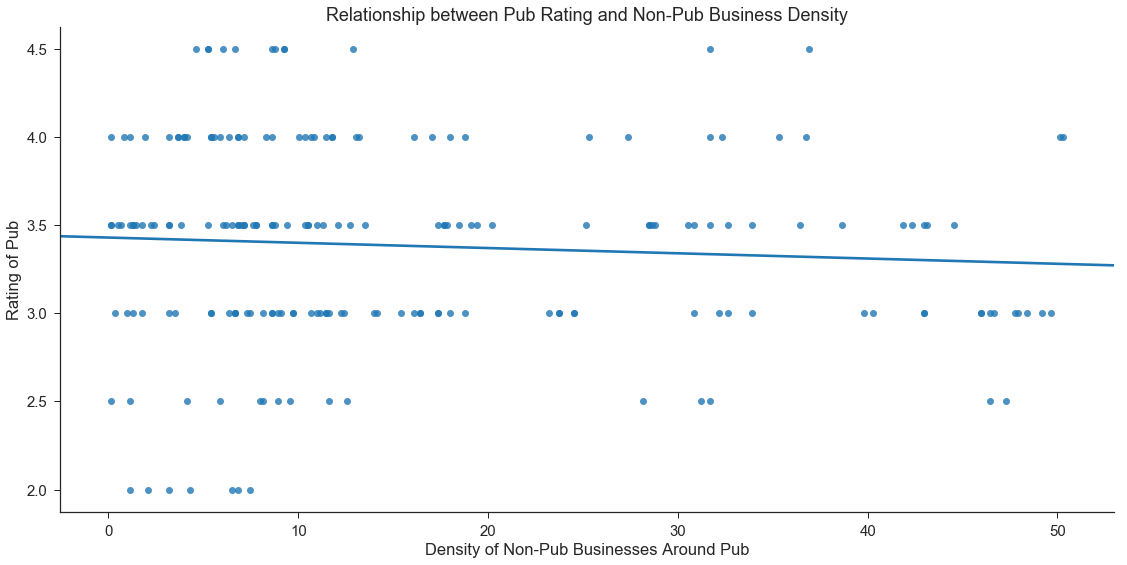

In [447]:
#Set style
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")

# Plot Data
g = sns.lmplot(x="density", y="rating", size=8,ci=None, data=final_businesses_df,aspect=2.0)

# Plot Labels
plt.title("Relationship between Pub Rating and Non-Pub Business Density")
plt.xlabel('Density of Non-Pub Businesses Around Pub')
plt.ylabel('Rating of Pub')

It seems from the above graph that there is no definite relationship between ratings of pubs and density of businesses. Infact. there seem to be more higher and lower rating pubs in low density areas as compared to high density areas in Toronto.

## Rating of a Pub Based on the Ratings of Other Pubs Around It

In [448]:
final_pubs_df = pd.DataFrame()

def haversine(x):
    
    global pubs_df
    global final_pubs_df
    
    # Initialize empty DataFrame
    df = pd.DataFrame()
    measure_1 = pd.DataFrame()
        
    # Calculate the latitudes, longitudes:
    df['LAT_rad'], df['LON_rad'] = np.radians(pubs_df['latitude']), np.radians(pubs_df['longitude'])
    df['dLON'] = df['LON_rad'] - math.radians(x['longitude'])
    df['dLAT'] = df['LAT_rad'] - math.radians(x['latitude'])

    # Use Haversine's formula
    pubs_df['distance'] = 6367 * 2 * np.arcsin(np.sqrt(np.sin(df['dLAT']/2)**2 + math.cos(math.radians(37.2175900)) * np.cos(df['LAT_rad']) * np.sin(df['dLON']/2)**2))
   
    # Only consider pubs within a distance of 1 km of the chosen pub
    measure_1 = pubs_df
    measure_1 = measure_1.loc[(pubs_df['distance'] > 0) & (pubs_df['distance'] <=1)]
    
    # Calculate the mean rating of the surrounding pubs
    mean_rating = measure_1['stars'].mean()
    density = (measure_1['stars'].count())/ (2*math.pi*1.0*1.0)

    final_pubs_df = final_pubs_df.append({'name': x['name'].item(), 'rating': x['stars'].item(), 'mean_business_rating': mean_rating, "density": density}, ignore_index=True)
    return final_pubs_df


for line in pubs_df['index_no']:
    x = pubs_df.loc[pubs_df['index_no'] == line]
    haversine(x)


We notice that the data has a few values with NaN as density. As NaN density is not relevant to the analysis, we remove lines that contain NaN. Moreover, we also remove the outliers ie. any mean_business_rating values that are less than 2.8 and more than 4.0

In [449]:
final_pubs_df = final_pubs_df[final_pubs_df.density != 0]

In [450]:
final_pubs_df = final_pubs_df[(final_pubs_df.mean_business_rating >= 3.0) & (final_pubs_df.mean_business_rating < 3.7)]
#final_pubs_df.describe()

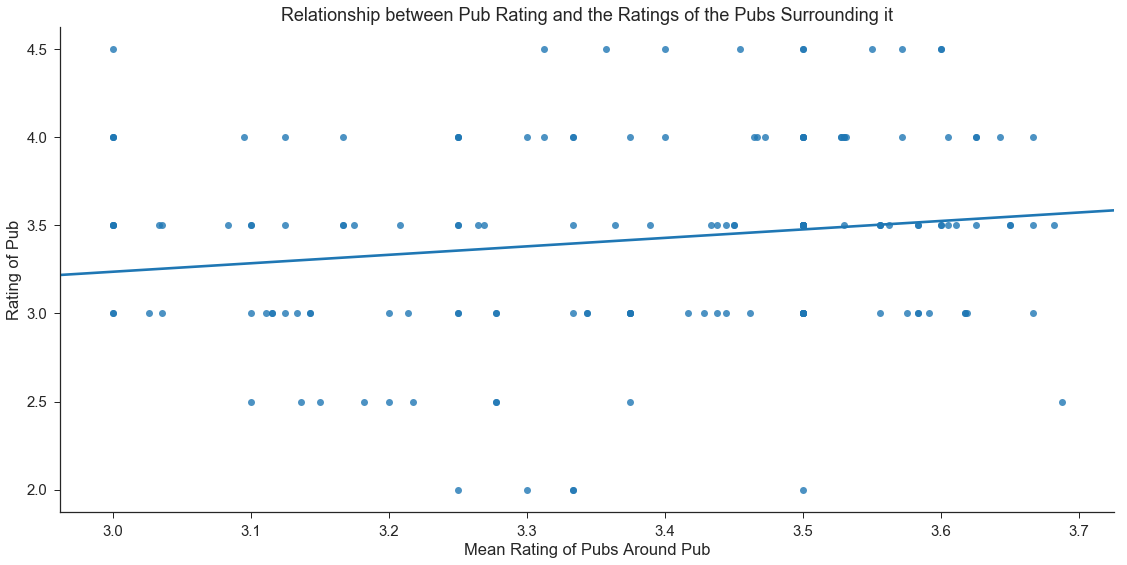

In [451]:
#Set style
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")

# Plot Data
g = sns.lmplot(x="mean_business_rating", y="rating", size=8,ci=None, data=final_pubs_df,aspect=2.0)

# Plot Labels
plt.title("Relationship between Pub Rating and the Ratings of the Pubs Surrounding it")
plt.xlabel('Mean Rating of Pubs Around Pub')
plt.ylabel('Rating of Pub')

## Ratings of Pubs Based on Ratings of Non-Pub Businesses

In [452]:
final_nonpubs_df = pd.DataFrame()

def haversine(x):
    
    global not_pubs_df
    global final_nonpubs_df
    
    # Initialize empty DataFrame
    df = pd.DataFrame()
    measure_1 = pd.DataFrame()
        
    # Calculate the latitudes, longitudes:
    df['LAT_rad'], df['LON_rad'] = np.radians(not_pubs_df['latitude']), np.radians(not_pubs_df['longitude'])
    df['dLON'] = df['LON_rad'] - math.radians(x['longitude'])
    df['dLAT'] = df['LAT_rad'] - math.radians(x['latitude'])

    # Use Haversine's formula
    not_pubs_df['distance'] = 6367 * 2 * np.arcsin(np.sqrt(np.sin(df['dLAT']/2)**2 + math.cos(math.radians(37.2175900)) * np.cos(df['LAT_rad']) * np.sin(df['dLON']/2)**2))
   
    # Only consider pubs within a distance of 1 km of the chosen pub
    measure_1 = not_pubs_df
    measure_1 = measure_1.loc[(not_pubs_df['distance'] > 0.0) & (not_pubs_df['distance'] <=1)]
    
    # Calculate the mean rating of the surrounding pubs
    mean_rating = measure_1['stars'].mean()
    density = (measure_1['stars'].count())/ (2*math.pi*1.0*1.0)

    final_nonpubs_df = final_nonpubs_df.append({'name': x['name'].item(), 'rating': x['stars'].item(), 'mean_business_rating': mean_rating, "density": density}, ignore_index=True)
    return final_nonpubs_df


for line in pubs_df['index_no']:
    x = pubs_df.loc[pubs_df['index_no'] == line]
    haversine(x)


In [453]:
final_nonpubs_df = final_nonpubs_df[(final_nonpubs_df.density != 0)]


In [454]:
final_nonpubs_df = final_nonpubs_df[(final_nonpubs_df.mean_business_rating >= 3.45) & (final_nonpubs_df.mean_business_rating < 4.0)]
final_nonpubs_df = final_nonpubs_df[(final_nonpubs_df.rating >= 2.2)]


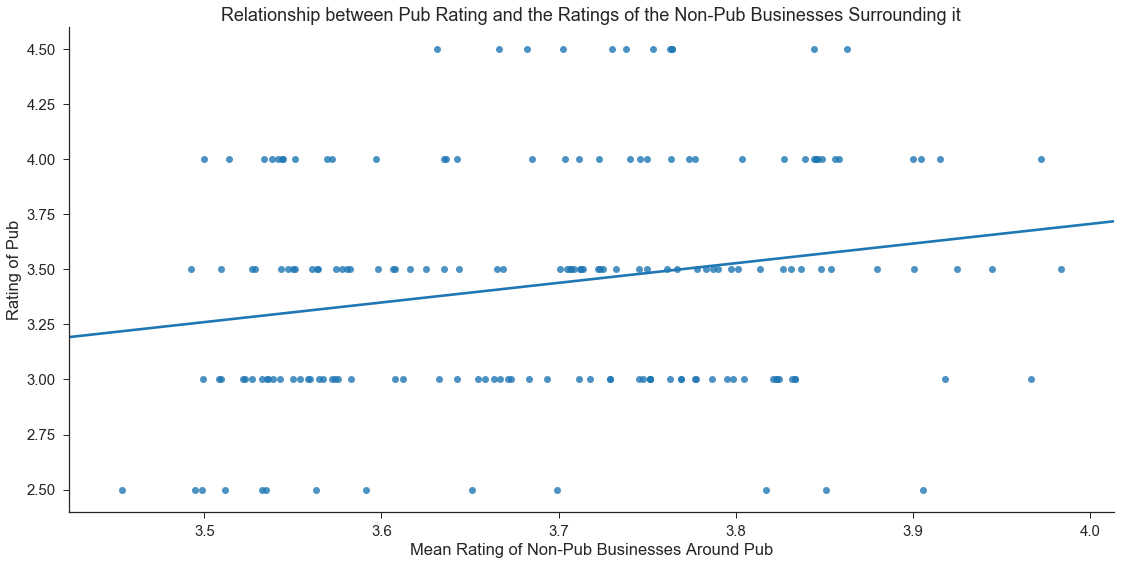

In [455]:
#Set style
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")

# Plot Data
g = sns.lmplot(x="mean_business_rating", y="rating", size=8, ci=None, data=final_nonpubs_df,aspect=2.0)

# Plot Labels
plt.title("Relationship between Pub Rating and the Ratings of the Non-Pub Businesses Surrounding it")
plt.xlabel('Mean Rating of Non-Pub Businesses Around Pub')
plt.ylabel('Rating of Pub')

#### We see that as the density of businesses increases, the quality of pubs decreases.

1. Consistant with Sutton's Model of Endogeneous Fixed Costs, pubs quality depends on variable costs so the market     fragments as it grows larger and the quality does not increase and infact decreases as density of businesses around it increases. The relationship between
   market size and the distribution of quality depends on whether quality is produced
   primarily through fixed or variable 

    Sutton's MOdel of Endogenous Fixed Costs:
    profit of firm  = marketsize * variablecost - F(quality)



#### Quality of Pub is higher if it is surrounded by high quality pubs

# Quality and Quantity

We are interested in understanding if quality drives competition and market size. 

In [456]:
pub_count_df = pd.DataFrame()

def haversine(x):
    
    global pubs_df
    global pub_count_df
    
    # Initialize empty DataFrame
    df = pd.DataFrame()
    measure_1 = pd.DataFrame()
        
    # Calculate the latitudes, longitudes:
    df['LAT_rad'], df['LON_rad'] = np.radians(pubs_df['latitude']), np.radians(pubs_df['longitude'])
    df['dLON'] = df['LON_rad'] - math.radians(x['longitude'])
    df['dLAT'] = df['LAT_rad'] - math.radians(x['latitude'])

    # Use Haversine's formula
    pubs_df['distance'] = 6367 * 2 * np.arcsin(np.sqrt(np.sin(df['dLAT']/2)**2 + math.cos(math.radians(37.2175900)) * np.cos(df['LAT_rad']) * np.sin(df['dLON']/2)**2))
   
    # Only consider pubs within a distance of 1 km of the chosen pub
    measure_1 = pubs_df
    measure_1 = measure_1.loc[pubs_df['distance'] <=2]
    
    # Calculate the number of pubs
    pub_count = len(measure_1.index)
    #density = (measure_1['stars'].count())/ (2*math.pi*1.0*1.0)

    pub_count_df = pub_count_df.append({'name': x['name'].item(), 'rating': x['stars'].item(), 'pub count':pub_count}, ignore_index=True)
    return pub_count_df


for line in pubs_df['index_no']:
    x = pubs_df.loc[pubs_df['index_no'] == line]
    haversine(x)


In [457]:
#pub_count_df = pub_count_df[(pub_count_df.rating >= 2.7)]


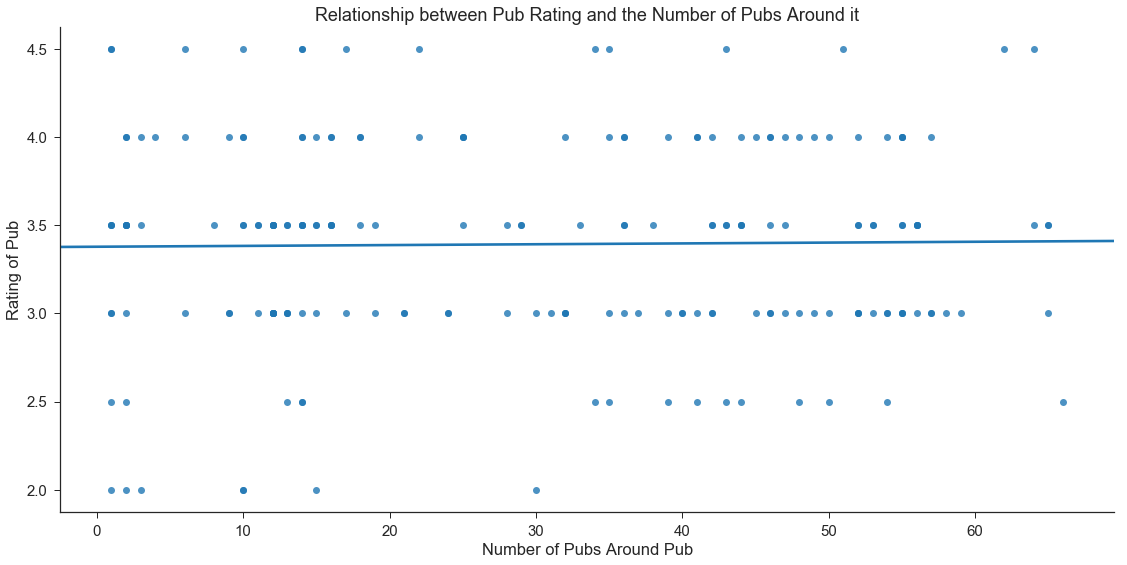

In [458]:
#Set style
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")

# Plot Data
g = sns.lmplot(x="pub count", y="rating", size=8, ci=None, data=pub_count_df,aspect=2.0)

# Plot Labels
plt.title("Relationship between Pub Rating and the Number of Pubs Around it")
plt.xlabel('Number of Pubs Around Pub')
plt.ylabel('Rating of Pub')

In [504]:
business_count_df = pd.DataFrame()

def haversine(x):
    
    global not_pubs_df
    global business_count_df
    
    # Initialize empty DataFrame
    df = pd.DataFrame()
    measure_1 = pd.DataFrame()
        
    # Calculate the latitudes, longitudes:
    df['LAT_rad'], df['LON_rad'] = np.radians(not_pubs_df['latitude']), np.radians(not_pubs_df['longitude'])
    df['dLON'] = df['LON_rad'] - math.radians(x['longitude'])
    df['dLAT'] = df['LAT_rad'] - math.radians(x['latitude'])

    # Use Haversine's formula
    not_pubs_df['distance'] = 6367 * 2 * np.arcsin(np.sqrt(np.sin(df['dLAT']/2)**2 + math.cos(math.radians(37.2175900)) * np.cos(df['LAT_rad']) * np.sin(df['dLON']/2)**2))
   
    # Only consider pubs within a distance of 1 km of the chosen pub
    measure_1 = not_pubs_df[not_pubs_df.distance <=1]
    
    # Calculate the number of pubs
    pub_count = len(measure_1.index)

    business_count_df = business_count_df.append({'name': x['name'].item(), 'rating': x['stars'].item(), 'pub_count':pub_count}, ignore_index=True)
    return business_count_df


for line in pubs_df['index_no']:
    x = pubs_df.loc[pubs_df['index_no'] == line]
    haversine(x)

In [513]:
business_count_df = business_count_df[(business_count_df.rating >= 2) & (business_count_df.pub_count <= 175)]
#business_count_df = business_count_df[(business_count_df.rating >= 2.4)]


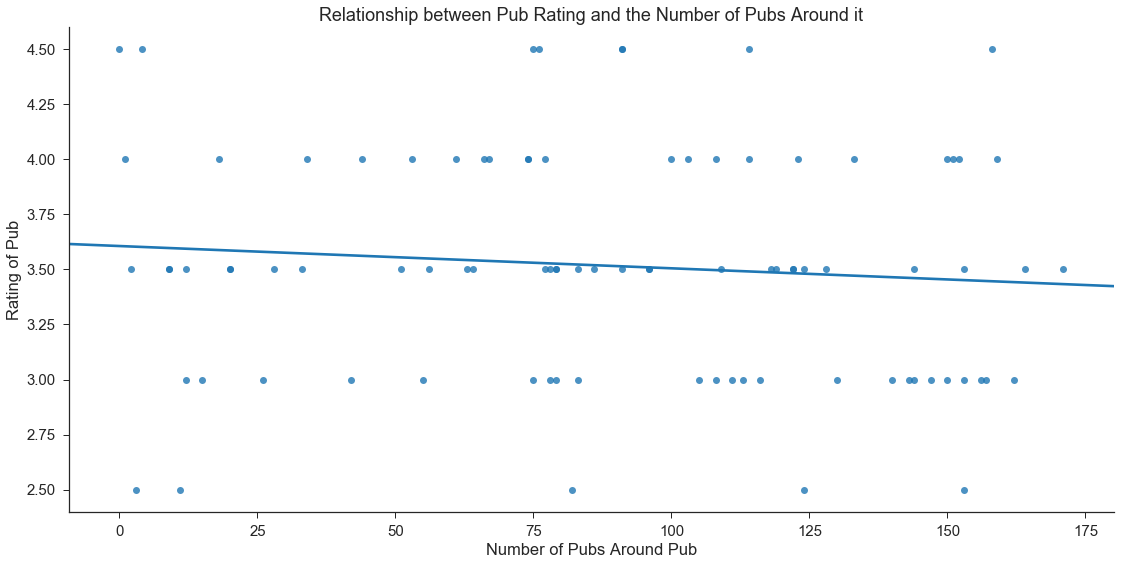

In [514]:
#Set style
sns.set_context("notebook", font_scale=1.5)
sns.set_style("ticks")

# Plot Data
g = sns.lmplot(x="pub_count", y="rating", size=8, ci=None, data=business_count_df,aspect=2.0)

# Plot Labels
plt.title("Relationship between Pub Rating and the Number of Pubs Around it")
plt.xlabel('Number of Pubs Around Pub')
plt.ylabel('Rating of Pub')